In [1]:
# library & dataset
import pandas as pd
import seaborn as sns
df = sns.load_dataset('iris')
import matplotlib.pyplot as plt

In [ ]:

rental_county_df = pd.read_csv("Resources/wa_rental_by_county.csv", index_col=0)
rental_county_df = rental_county_df.dropna()
rental_county_df.head()


In [ ]:
#Creating date range index series
dates=pd.date_range(start='1/1/2017', end='12/1/2021', freq='M')

#Creating the list of counties from the rental_county_df. 
fips=pd.Series(rental_county_df.FIPS_Code.unique()).astype(str)

df = pd.MultiIndex.from_product([dates, fips], names = ['Date', 'FIPS'])
df = pd.DataFrame(index = df).reset_index()

#Merging in the rental data
#First set the index for the rental data
rental_county_df.rename(columns={"FIPS_Code": "FIPS"}, inplace=True)
rental_county_df.set_index(['Date', 'FIPS'], inplace=True)
correlogram_df = rental_county_df.loc[:,['Average_Rental_Price']]

In [ ]:
correlogram_df.head()

In [ ]:
employment_county_df = pd.read_csv("Resources/wa_employment_by_county_final.csv", index_col=0)
employment_county_df.rename(columns={"FIPS_CODE": "FIPS"}, inplace=True)
employment_county_df.set_index(['Date', 'FIPS'], inplace=True)

employment_county_df.head()

In [ ]:
correlogram_df = correlogram_df.join(employment_county_df)
correlogram_df.head()

In [ ]:
labor_county_df = pd.read_csv("Resources/wa_labor_force_by_county_final.csv", index_col=0)
labor_county_df.rename(columns={"FIPS_CODE": "FIPS"}, inplace=True)
labor_county_df.set_index(['Date', 'FIPS'], inplace=True)

labor_county_df.head()

In [ ]:
correlogram_df = correlogram_df.join(labor_county_df)
correlogram_df.head()

In [18]:
housing_df = pd.read_csv("Resources/house_listing.csv", index_col=0)
housing_df.rename(columns={"county_fips": "FIPS"}, inplace=True)
housing_df.set_index(['Date', 'FIPS','county_name','state'], inplace=True)
housing_df = housing_df.loc['2021-12-01']
housing_levels_df = housing_df.drop(columns=['median_listing_price_mm', 'median_listing_price_yy', 'active_listing_count_mm',
                                            'active_listing_count_yy','median_days_on_market_mm','median_days_on_market_yy',
                                            'new_listing_count_mm','new_listing_count_yy','price_increased_count_mm',
                                            'price_increased_count_yy','price_reduced_count_mm','price_reduced_count_yy',
                                            'pending_listing_count_mm','pending_listing_count_yy',
                                            'median_listing_price_per_square_foot_mm','median_listing_price_per_square_foot_yy',
                                            'median_square_feet_mm','median_square_feet_yy','average_listing_price_mm',
                                            'average_listing_price_yy','total_listing_count_mm','total_listing_count_yy',
                                            'pending_ratio_mm','pending_ratio_yy','quality_flag'])

housing_levels_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3092 entries, (1055, 'etowah', 'al') to (37151, 'randolph', 'nc')
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   median_listing_price                  3092 non-null   float64
 1   active_listing_count                  3092 non-null   int64  
 2   median_days_on_market                 3092 non-null   float64
 3   new_listing_count                     3092 non-null   int64  
 4   price_increased_count                 3092 non-null   int64  
 5   price_reduced_count                   3092 non-null   int64  
 6   pending_listing_count                 3092 non-null   int64  
 7   median_listing_price_per_square_foot  3090 non-null   float64
 8   median_square_feet                    3090 non-null   float64
 9   average_listing_price                 3092 non-null   float64
 10  total_listing_count                   3092

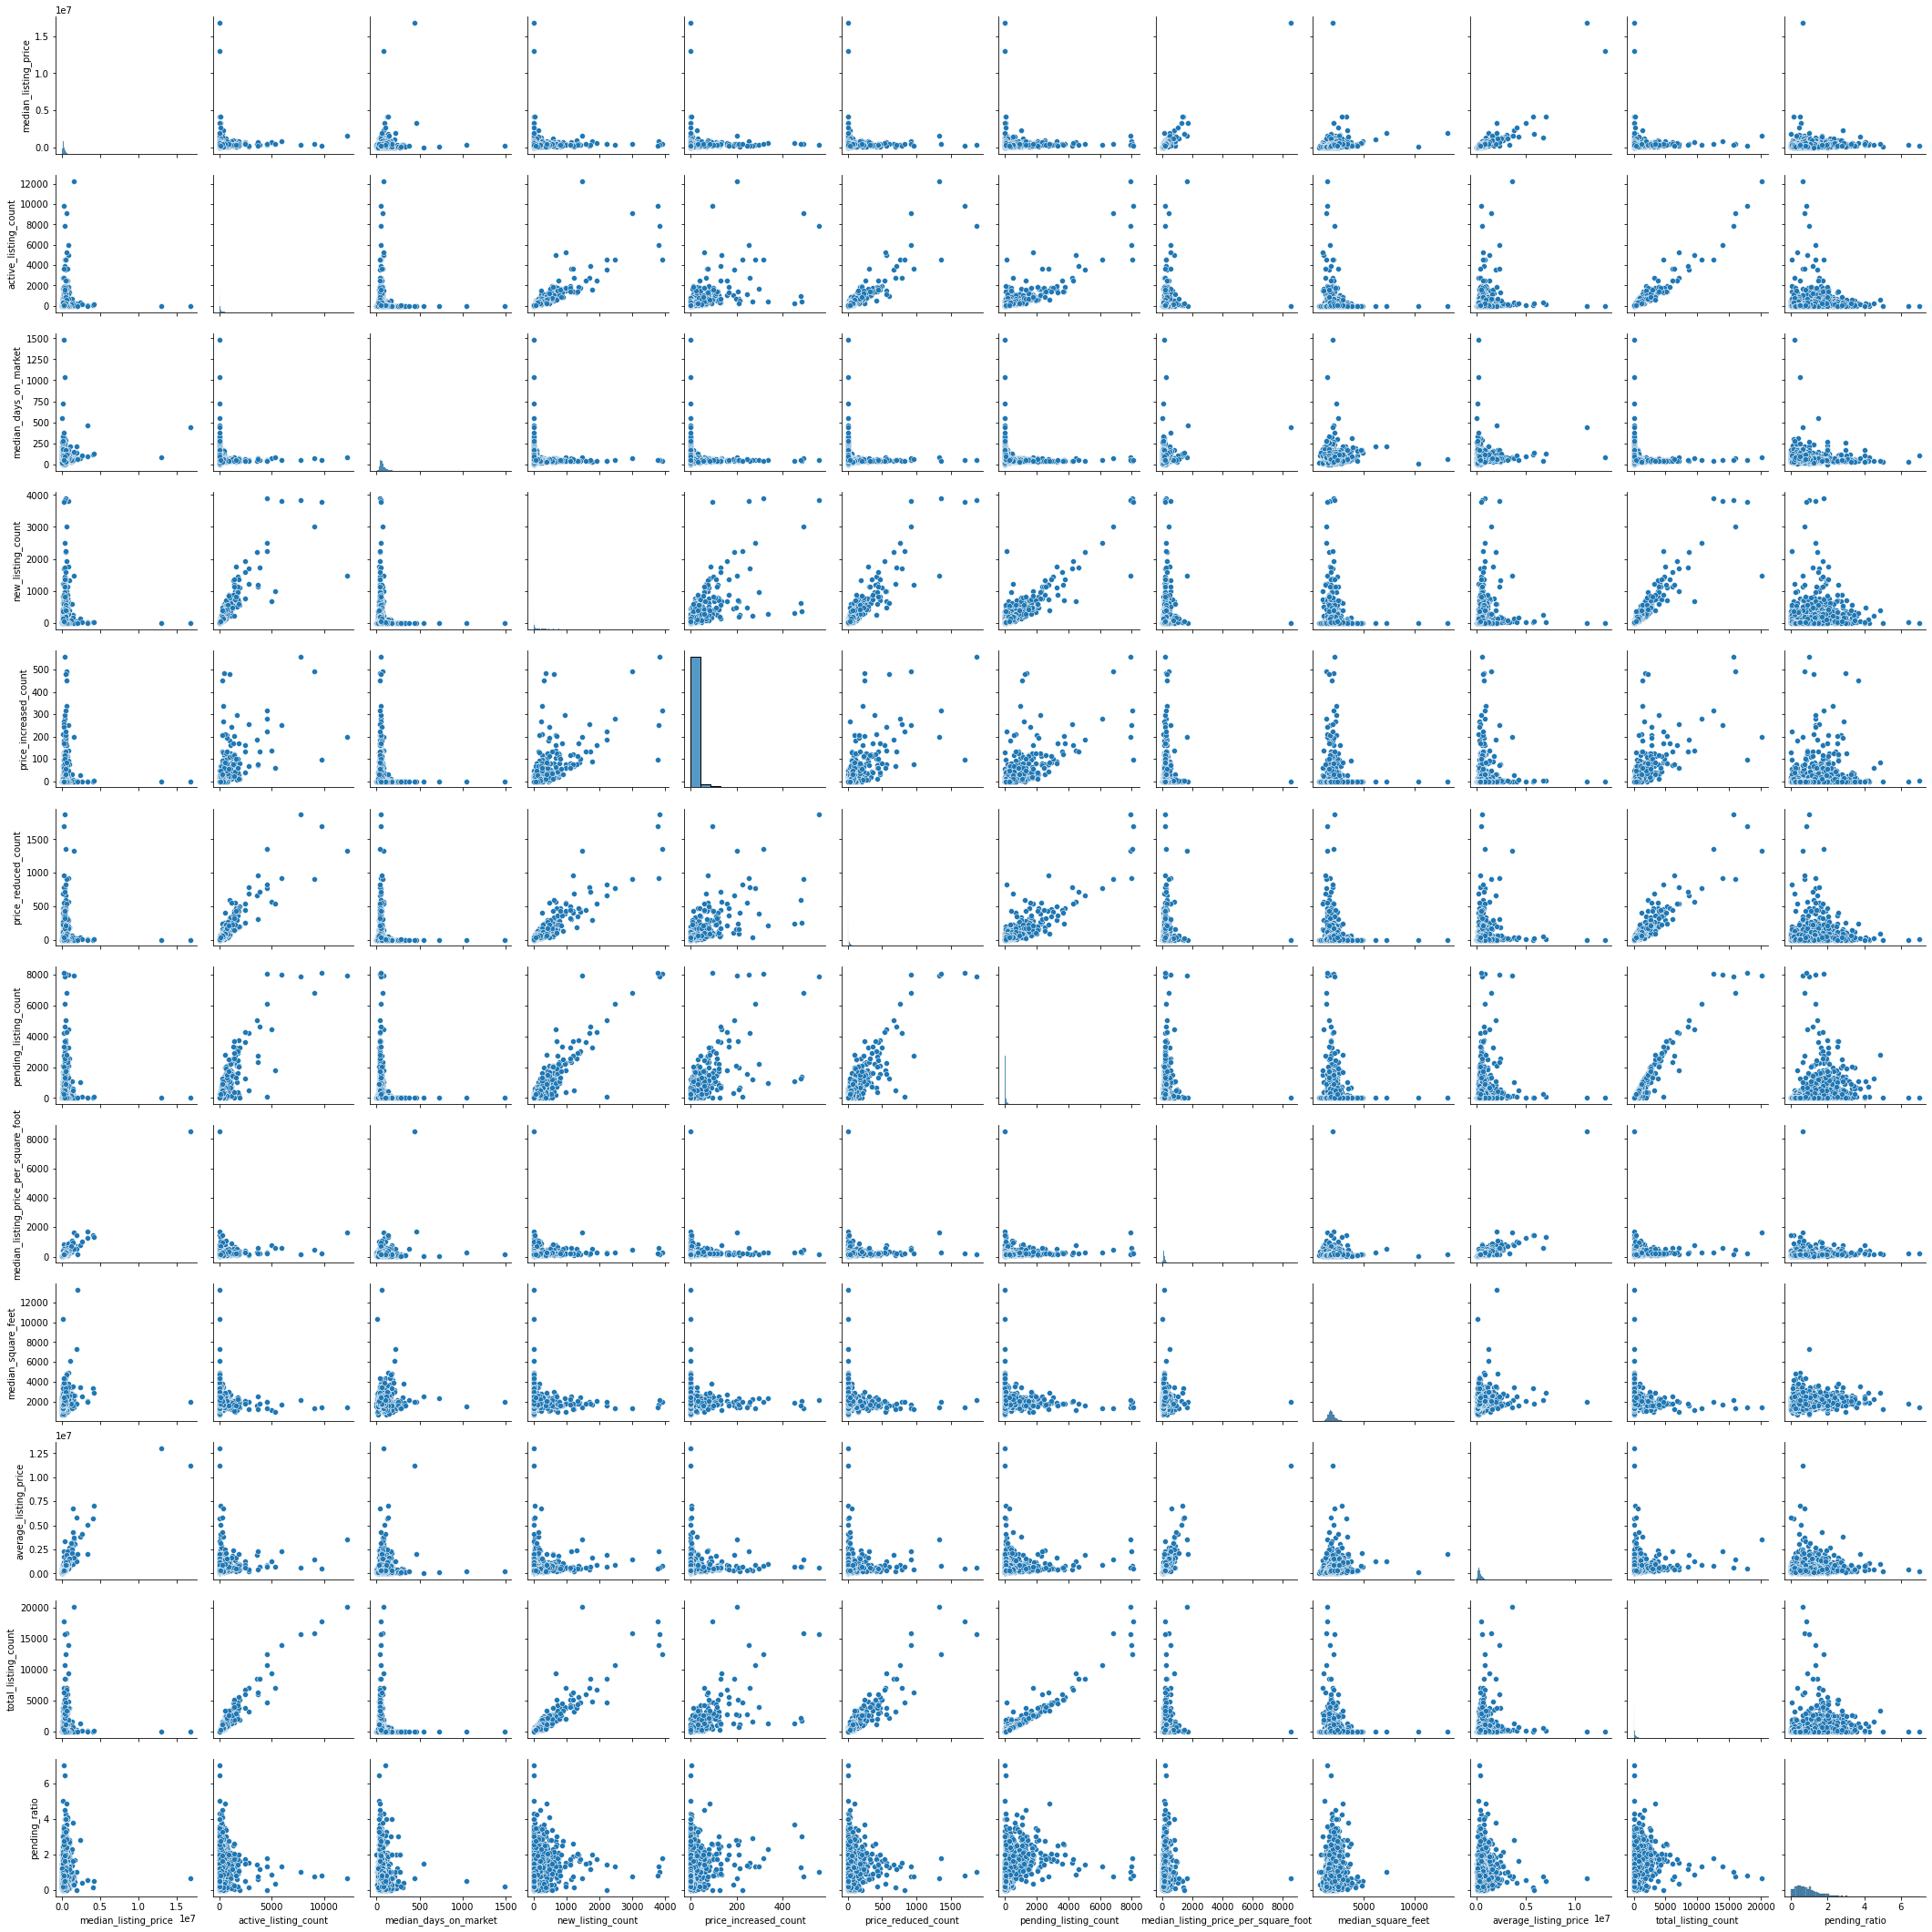

In [19]:
# Basic correlogram
sns.pairplot(housing_levels_df)
plt.show()

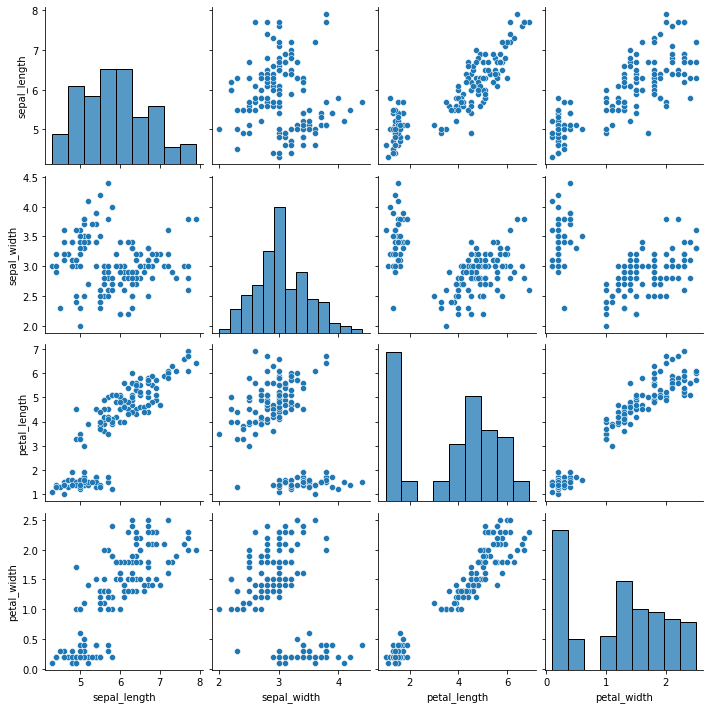

In [20]:
# Basic correlogram
sns.pairplot(df)
plt.show()